# Autocorrector

## Ej1. Generar exámenes de manera automática (3 pts.).

El código debe generar un enunciado de un examen de matemáticas para alumnos de primaria de manera automática. El examen constará de una serie de operaciones sencillas. Las operaciones estarán formadas por dos números enteros aleatorios entre 1 y 99. El operador debe elegirse aleatoriamente entre los siguientes:

* SUMA: +
* RESTA: -
* MULTIPLICACION: *
* DIVISION REAL: /
* DIVISION ENTERA: //
* RESTO DE DIVISION ENTERA: %

El resultado de ejecutar el código debe ser un fichero de texto con operaciones sin resolver, una por línea, como en el siguiente ejemplo:

        12+5=
        20/4=
        22//4=
        22%4=
        35-12=
        80*2=
        
El código debe implementarse dentro de una función. Todas las tareas necesarias (apertura y grabación del fichero, generación de las operaciones,...) debe realizarse dentro de una función con la siguiente cabecera:

#### SOLUCIÓN.

In [1]:
from random import randint

def genera_examen_aleatorio(nombre_fichero, num_preguntas):
    operators=["+","-","*","/","//","%"]
    with open(nombre_fichero, "w") as f:
        for i in range(num_preguntas):
            op1=randint(1,99)
            op2=randint(1,99)
            operator_index=randint(0,5)
            question=str(op1)+operators[operator_index]+str(op2)+"="+"\n"
            f.write(question)

Esta función, invocada desde el siguiente código, debería permitir generar un examen aleatorio para 5 alumnos:

In [ ]:
N=5  # Número de alumnos
Q=20 # Número de preguntas por examen
for i in range(N):
    nombrefichero="examen"+str(i)+".txt"
    genera_examen_aleatorio(nombrefichero,Q)

NOTA. No es necesario ejecutar la celda anterior ni generar N exámenes. El propósito del código es sólo que el alumno vea el contexto en el que se invocaría la función

## Ej2. Corregir exámenes de manera automática (3 pts.).

El código debe leer los examenes que han realizado alumnos de primaria y calcular su nota. Los ficheros contienen operaciones matemáticas sencillas, los alumnos han debido de proporcionar una respuesta a cada una de esas operaciones. Si la operación es correcta, el alumno obtiene un punto. Si el alumno no ha proporcionado una respuesta, el alumno no obtiene ningún punto. Si la respuesta es incorrecta la nota del alumno se penaliza con -0.50 puntos. Sólo existen 6 operaciones:

* SUMA: "+"
* RESTA: "-"
* MULTIPLICACION: "*"
* DIVISION REAL: "/"
* DIVISION ENTERA: "//"
* RESTO DE DIVISION ENTERA: "%"

El fichero de cada alumno consta de 20 operaciones con sus respuestas en el siguiente formato:

        12+5=17
        20/4=5
        22//4=5
        22%4=2
        35-12=
        80*2=170
        
El resultado de analizar la secuencia anterior sería el siguiente:

        12+5=17    --> SUMA. Correcto: +1pto
        22/4=5.5   --> DIVISION REAL. Correcto: +1pto
        22//4=5    --> DIVISION ENTERA. Correcto: +1pto
        22%4=2     --> RESTO DE DIVISION ENTERA. Correcto: +1pto
        35-12=     --> RESTA. No respondido: 0ptos
        80*2=170   --> MULTIPLICACION. Incorrecto: -0.5ptos.

En las operaciones no se pueden utilizar numeros negativos ni como operadores ni como resultado y cada operación sólo consta de dos operandos y un operador.

Realizar un código que lea el fichero "alumno1.txt", obtenga el nombre del alumno de la primera línea, verifique las operaciones y devuelva su nota final por pantalla con el siguiente formato:

        "El alumno Luis Francisco Sánchez Merchante ha obtenido un 8 sobre 20"
        

#### SOLUCIÓN.

In [24]:
with open("alumno1.txt","r") as f:
    nombre=f.readline()[:-1]
    ignore_this_line=f.readline()
    nota=0
    for i in range(20):
        operation=f.readline()[:-1]
        question,result=operation.split("=")
        if result=="":
            nota=nota+0
        else:
            if len(question.split("+"))==2:
                op1,op2=question.split("+")
                if float(op1)+float(op2)==float(result):
                    nota=nota+1
                else:
                    nota=nota-0.5
            elif len(question.split("-"))==2:
                op1,op2=question.split("-")
                if float(op1)-float(op2)==float(result):
                    nota=nota+1
                else:
                    nota=nota-0.5           
            elif len(question.split("*"))==2:
                op1,op2=question.split("*")
                if float(op1)*float(op2)==float(result):
                    nota=nota+1
                else:
                    nota=nota-0.5
            elif len(question.split("/"))==2:
                op1,op2=question.split("/")
                if float(op1)/float(op2)==float(result):
                    nota=nota+1
                else:
                    nota=nota-0.5                
            elif len(question.split("//"))==2:
                op1,op2=question.split("//")
                if float(op1)//float(op2)==float(result):
                    nota=nota+1
                else:
                    nota=nota-0.5                
            elif len(question.split("%"))==2:
                op1,op2=question.split("%")
                if float(op1)%float(op2)==float(result):
                    nota=nota+1
                else:
                    nota=nota-0.5                
            else:
                print("Operador no reconocido")
print("El alumno %s ha obtenido un %.1f sobre 20" % (nombre,nota))

El alumno Luis Francisco Sanchez Merchante ha obtenido un 12.5 sobre 20


## Ej3. Impresión de resultados (1 ptos)

Ejecutando el siguiente código se cargan dos listas, una con los nombres de varios alumnos (variable **nombres**) y otra con las notas finales, sobre 20, de cada uno (variable **notas**):

        import pickle
        nombres, notas =pickle.load(open( "actas.dat", "rb" ))
    
Hacer un código que muestre por pantalla un informe similar al siguiente:

        El alumno      Gines Carbonell ha obtenido un 9.90 sobre 20
        El alumno       Zaira Cardenas ha obtenido un 2.57 sobre 20
        El alumno          Asier López ha obtenido un 6.53 sobre 20
        El alumno     Jennifer Latorre ha obtenido un 1.65 sobre 20

#### SOLUCIÓN 1.

In [2]:
import pickle
nombres, notas =pickle.load(open( "actas.dat", "rb" ))

In [9]:
for i,j in list(zip(nombres,notas)):
    print("El alumno %20s ha obtenido un %.2f sobre 20" % (i,j))

El alumno      Gines Carbonell ha obtenido un 9.90 sobre 20
El alumno       Zaira Cardenas ha obtenido un 2.57 sobre 20
El alumno          Asier López ha obtenido un 6.53 sobre 20
El alumno     Jennifer Latorre ha obtenido un 1.65 sobre 20
El alumno           Vega Costa ha obtenido un 7.39 sobre 20
El alumno        Rafael Cantos ha obtenido un 1.94 sobre 20
El alumno       Pilar Morillas ha obtenido un 5.74 sobre 20
El alumno     Borja Cabanillas ha obtenido un 4.81 sobre 20
El alumno     Natividad Parada ha obtenido un 7.64 sobre 20
El alumno          Paula Olmos ha obtenido un 5.50 sobre 20
El alumno       Josue Figueroa ha obtenido un 7.19 sobre 20


#### SOLUCIÓN 2.

In [13]:
import pickle
nombres, notas =pickle.load(open( "actas.dat", "rb" ))

In [14]:
for i in range(len(nombres)):
    print("El alumno %20s ha obtenido un %.2f sobre 20" % (nombres[i],notas[i]))

El alumno      Gines Carbonell ha obtenido un 9.90 sobre 20
El alumno       Zaira Cardenas ha obtenido un 2.57 sobre 20
El alumno          Asier López ha obtenido un 6.53 sobre 20
El alumno     Jennifer Latorre ha obtenido un 1.65 sobre 20
El alumno           Vega Costa ha obtenido un 7.39 sobre 20
El alumno        Rafael Cantos ha obtenido un 1.94 sobre 20
El alumno       Pilar Morillas ha obtenido un 5.74 sobre 20
El alumno     Borja Cabanillas ha obtenido un 4.81 sobre 20
El alumno     Natividad Parada ha obtenido un 7.64 sobre 20
El alumno          Paula Olmos ha obtenido un 5.50 sobre 20
El alumno       Josue Figueroa ha obtenido un 7.19 sobre 20


## Ej4. Representación de estadísticas (3 ptos)

Ejecutando el siguiente código se carga un diccionario "notas" que tiene como clave el ID de 60 alumnos y como valor una lista con 10 puntuaciones correspondientes a las 10 preguntas de un examen.

        import pickle
        notas=pickle.load(open( "notas.dat", "rb" ))

Calcular la nota media de cada pregunta y representarla en un gráfico similar a este:

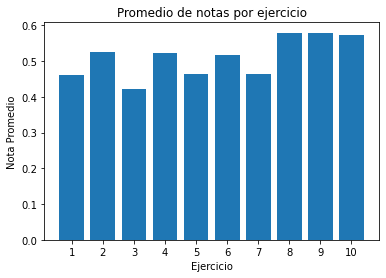

Una posibilidad es recorrer el diccionario e ir almacenando las notas de cada ejercicio en una lista de manera que luego se pueda promediar facilmente las notas del ejercicio 1, el ejercicio 2,... para después visualizarlas. Aunque no es el único enfoque.

**SOLUCIÓN 1 (manejando diccionarios y listas):**

In [80]:
import pickle
notas=pickle.load(open( "notas.dat", "rb" ))

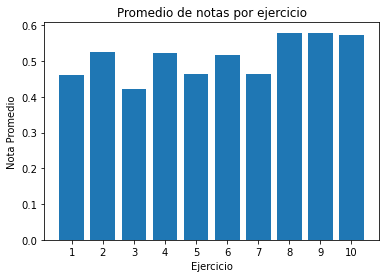

In [73]:
import numpy as np
import matplotlib.pyplot as plt

notas_por_ejercicios={1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[]}
for k,v in notas.items():
    for i in range(len(v)):
        notas_por_ejercicios[i+1].append(v[i])

eje=[]
promedios=[]
for k,v in notas_por_ejercicios.items():
    eje.append(k)
    promedios.append(np.mean(v))
    
plt.bar(eje,promedios)
plt.title("Promedio de notas por ejercicio")
plt.xlabel("Ejercicio")
plt.ylabel("Nota Promedio")
plt.xticks(eje,eje)
plt.show()

**SOLUCIÓN 2 (usando pandas):**

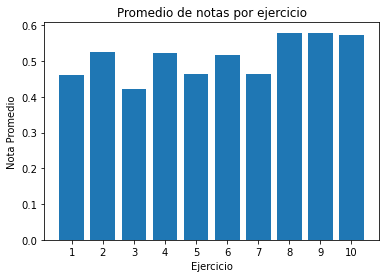

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

promedios=[]
for v in notas.values():
    promedios.append(v)

df=pd.DataFrame(promedios,columns=range(1,11))
plt.bar(range(1,11),df.mean())
plt.title("Promedio de notas por ejercicio")
plt.xlabel("Ejercicio")
plt.ylabel("Nota Promedio")
plt.xticks(range(1,11),range(1,11))
plt.show()